# Jobsheet 05 - Decision tree

- Nama  : M Favian Apta Syahputra
- Kelas : TI-3A
- NIM   : 2041720189

## Tugas 

Lakukanlah proses classification learning Decision Tree dengan ketentuan,

1. Menggunakan data `mushrooms.csv`
2. Evaluasi hasilnya

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns
import graphviz

from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [85]:
mfas = pd.read_csv("./mushrooms.csv")
mfas.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [86]:
mfas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [87]:
mfas["class"].unique()

array(['p', 'e'], dtype=object)

In [88]:
mfas.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [89]:
mfas.shape

(8124, 23)

In [90]:
mfas.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [91]:
mfas.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [92]:
encoder = LabelEncoder()
mfas_encoded = mfas.copy()
for col in mfas_encoded.columns:
    mfas_encoded[col] = encoder.fit_transform(mfas_encoded[col])

mfas_encoded

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [93]:
mfas_encoded.max()

class                        1
cap-shape                    5
cap-surface                  3
cap-color                    9
bruises                      1
odor                         8
gill-attachment              1
gill-spacing                 1
gill-size                    1
gill-color                  11
stalk-shape                  1
stalk-root                   4
stalk-surface-above-ring     3
stalk-surface-below-ring     3
stalk-color-above-ring       8
stalk-color-below-ring       8
veil-type                    0
veil-color                   3
ring-number                  2
ring-type                    4
spore-print-color            8
population                   5
habitat                      6
dtype: int32

In [94]:
mfas_encoded.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [95]:
def plot_col(col, hue=None, color=['blue', 'red'], labels=None):
    fig, ax = plt.subplots(figsize=(15, 7))
    sns.countplot(col, hue=hue, palette=color, saturation=0.6, data=mfas_encoded, dodge=True, ax=ax)
    ax.set(title = f"Mushroom {col.title()} Quantity", xlabel=f"{col.title()}", ylabel="Quantity")
    
    if labels != None:
        ax.set_xticklabels(labels)
    if hue!= None:
        ax.legend(('Edible', 'Poisonous'), loc = 0)

C:\Users\mfavi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



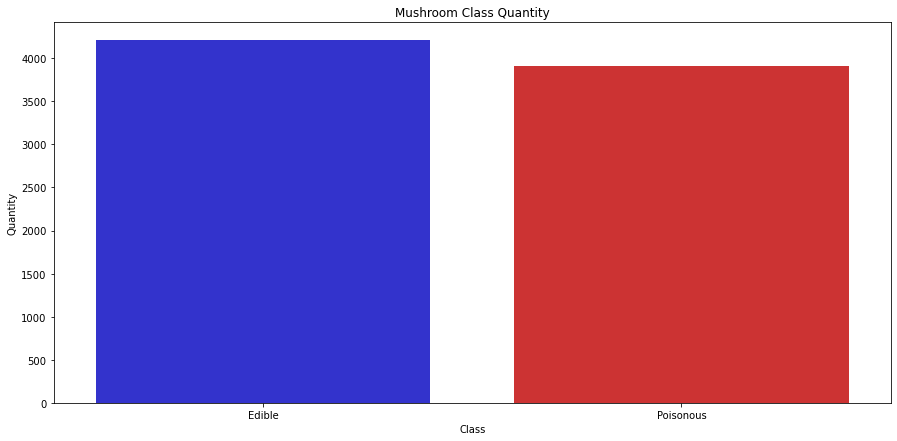

In [96]:
class_dict = ('Edible', 'Poisonous')
plot_col(col='class', labels = class_dict)

C:\Users\mfavi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



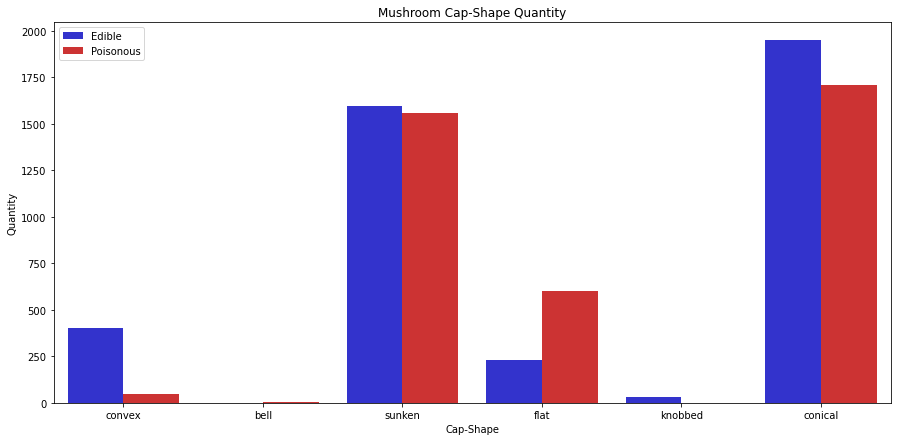

In [97]:
shape_dict = {"bell" : "b", "conical":"c", "convex":"x", "flat":"f", "knobbed":"k", "sunken":"s"}
labels = ('convex', 'bell', 'sunken', 'flat', 'knobbed', 'conical')
plot_col(col='cap-shape', hue='class', labels = labels)

C:\Users\mfavi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



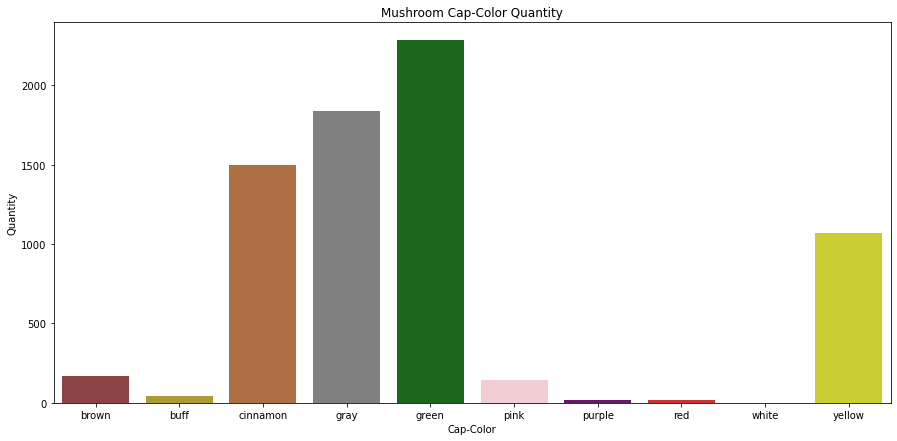

In [98]:
buff = "#d5b60a"
cinnamon = "#D2691E"

color_dict = {"brown" : "n", buff:"b", cinnamon:"c", "gray":"g", "green":"r", "pink":"p", 
                "purple" : "u", "red":"e", "white":"w", "yellow":"y"}
labels = ('brown', 'buff', 'cinnamon', 'gray', 'green', 'pink', 'purple', 'red', 'white', 'yellow')
plot_col(col='cap-color', color=color_dict.keys(), labels = labels)

C:\Users\mfavi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



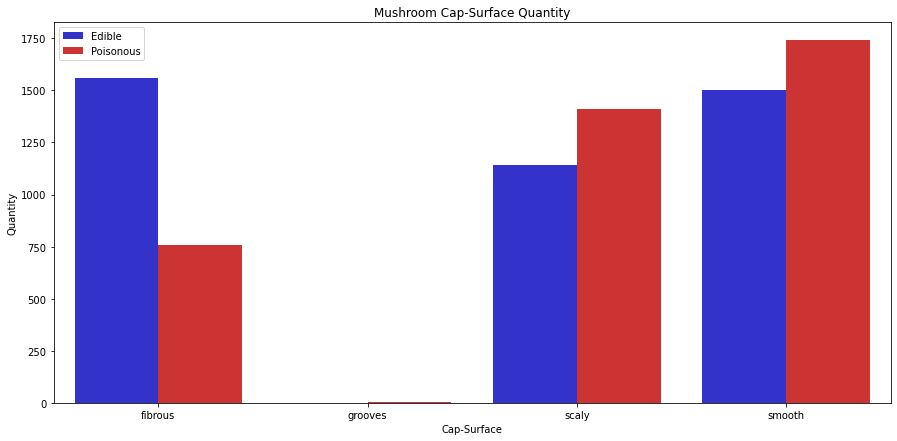

In [99]:
surface_dict = {"fibrous" : "f", "grooves":"g", "scaly":"y", "smooth":"s"}
plot_col(col = 'cap-surface', hue = 'class', labels=surface_dict)

In [100]:
def get_labels(order, a_dict):
    labels = []
    for values in order:
        for key, value in a_dict.items():
            if values == value:
                labels.append(key)
    return labels

C:\Users\mfavi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



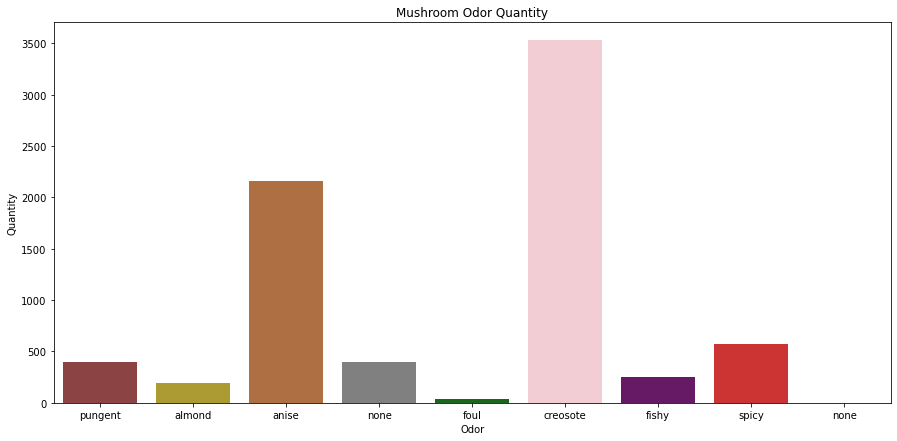

In [101]:
odor_dict = {"almond" : "a", "anise" : "l", "creosote" : "c", "fishy" : "y", "foul" : "f",
             "musty" : "m", "none" : "n", "pungent" : "p", "spicy" : "s"}
order = ['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'n']
labels = get_labels(order, odor_dict)
plot_col(col='odor', color=color_dict.keys(), labels=labels)

In [102]:
stalk_cats = ['class', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
              'stalk-color-above-ring', 'stalk-color-below-ring']
data_cats = mfas_encoded[stalk_cats]
sns.pairplot(data_cats, hue='class', kind='reg')

In [ ]:
labels = ['Edible', 'Poison']
values = mfas_encoded['class'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_traces(hoverinfo = 'label+percent', textinfo = 'value', textfont_size = 20,
                  marker = dict(colors=['#87CEFA', '#7FFF00'],
                                line = dict(color='#FFFFFF', width=3)))
fig.show()

In [ ]:
y = mfas_encoded["class"].values
x = mfas_encoded.drop(["class"],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42, test_size = 0.25)

In [ ]:
dt_entropy = DecisionTreeClassifier(criterion='entropy')
dt_gini = DecisionTreeClassifier(criterion='gini')
dt = DecisionTreeClassifier()

# Fit Model

dt.fit(x_train, y_train)

# Entropy
dt_entropy.fit(x_train, y_train)
y_pred_entropy_train = dt_entropy.predict(x_train)
y_pred_entropy = dt_entropy.predict(x_test)


# Gini
dt_gini.fit(x_train, y_train)
y_pred_gini_train = dt_gini.predict(x_train)
y_pred_gini = dt_gini.predict(x_test)

# Evaluasi

# Entropy
acc_entropy_train = accuracy_score(y_train, y_pred_entropy_train)
acc_entropy = accuracy_score(y_test, y_pred_entropy)

# Gini
acc_gini_train = accuracy_score(y_train, y_pred_gini_train)
acc_gini = accuracy_score(y_test, y_pred_gini)

print(f'Akurasi Entropy Train   : {acc_entropy_train}')
print(f'Akurasi Entropy         : {acc_entropy}')
print('\n')
print(f'Akurasi Gini Train      : {acc_gini_train}')
print(f'Akurasi Gini            : {acc_gini}')
print('\n')
print("Test Accuracy           : {}%" .format(round(dt.score(x_test, y_test)*100,2)))

Akurasi Entropy Train   : 1.0
Akurasi Entropy         : 1.0


Akurasi Gini Train      : 1.0
Akurasi Gini            : 1.0


Test Accuracy           : 100.0%


In [ ]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

[Text(334.8, 380.52, 'X[8] <= 3.5\ngini = 0.499\nsamples = 6093\nvalue = [3168, 2925]'),
 Text(167.4, 271.8, 'X[20] <= 3.5\ngini = 0.278\nsamples = 2463\nvalue = [410, 2053]'),
 Text(83.7, 163.07999999999998, 'X[19] <= 1.5\ngini = 0.211\nsamples = 441\nvalue = [388, 53]'),
 Text(41.85, 54.360000000000014, 'gini = 0.0\nsamples = 34\nvalue = [0, 34]'),
 Text(125.55000000000001, 54.360000000000014, 'gini = 0.089\nsamples = 407\nvalue = [388, 19]'),
 Text(251.10000000000002, 163.07999999999998, 'X[10] <= 2.0\ngini = 0.022\nsamples = 2022\nvalue = [22, 2000]'),
 Text(209.25, 54.360000000000014, 'gini = 0.008\nsamples = 2008\nvalue = [8, 2000]'),
 Text(292.95, 54.360000000000014, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(502.20000000000005, 271.8, 'X[19] <= 1.5\ngini = 0.365\nsamples = 3630\nvalue = [2758, 872]'),
 Text(418.5, 163.07999999999998, 'X[10] <= 0.5\ngini = 0.205\nsamples = 544\nvalue = [63, 481]'),
 Text(376.65000000000003, 54.360000000000014, 'gini = 0.0\nsamples = 63\

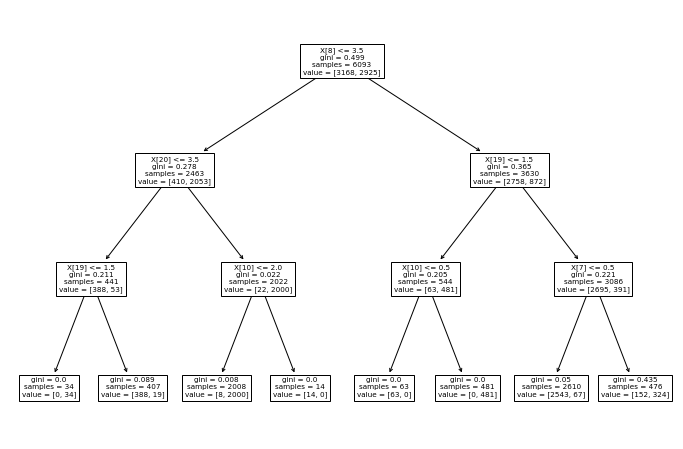

In [ ]:
plt.figure(figsize=(12,8))

tree.plot_tree(clf_gini.fit(x_train, y_train))

In [ ]:
y_pred_gini = clf_gini.predict(x_test)

#Predict the value using X train for accuracy comparision 
y_pred_train_gini = clf_gini.predict(x_train)

y_pred_train_gini

array([1, 1, 0, ..., 0, 1, 0])

In [ ]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Model accuracy score with criterion gini index: 0.9557
Training-set accuracy score: 0.9596


In [ ]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

[Text(251.10000000000002, 380.52, 'X[8] <= 0.5\nentropy = 0.999\nsamples = 6093\nvalue = [3168, 2925]'),
 Text(167.4, 271.8, 'entropy = 0.0\nsamples = 1298\nvalue = [0, 1298]'),
 Text(334.8, 271.8, 'X[19] <= 1.5\nentropy = 0.924\nsamples = 4795\nvalue = [3168, 1627]'),
 Text(167.4, 163.07999999999998, 'X[4] <= 3.5\nentropy = 0.315\nsamples = 1250\nvalue = [71, 1179]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.0\nsamples = 1179\nvalue = [0, 1179]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.0\nsamples = 71\nvalue = [71, 0]'),
 Text(502.20000000000005, 163.07999999999998, 'X[7] <= 0.5\nentropy = 0.547\nsamples = 3545\nvalue = [3097, 448]'),
 Text(418.5, 54.360000000000014, 'entropy = 0.185\nsamples = 3016\nvalue = [2931, 85]'),
 Text(585.9, 54.360000000000014, 'entropy = 0.898\nsamples = 529\nvalue = [166, 363]')]

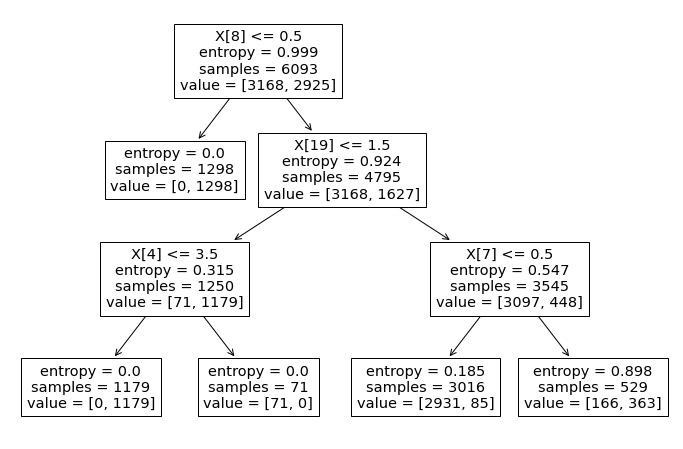

In [ ]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_en.fit(x_train, y_train))

In [ ]:
y_pred_en = clf_en.predict(x_test)

#Predict the value using X train for accuracy comparision
y_pred_train_en = clf_en.predict(x_train)

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Model accuracy score with criterion entropy: 0.9522
Training-set accuracy score: 0.9588


In [ ]:
print('Training set score: {:.4f}'.format(clf_en.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(x_test, y_test)))

Training set score: 0.9588
Test set score: 0.9522
